<a href="https://colab.research.google.com/github/Artorius81/labs_ml_basov/blob/main/labs/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5_%D0%91%D0%B0%D1%81%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df = df.drop(['CUST_ID'],axis = 1)
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


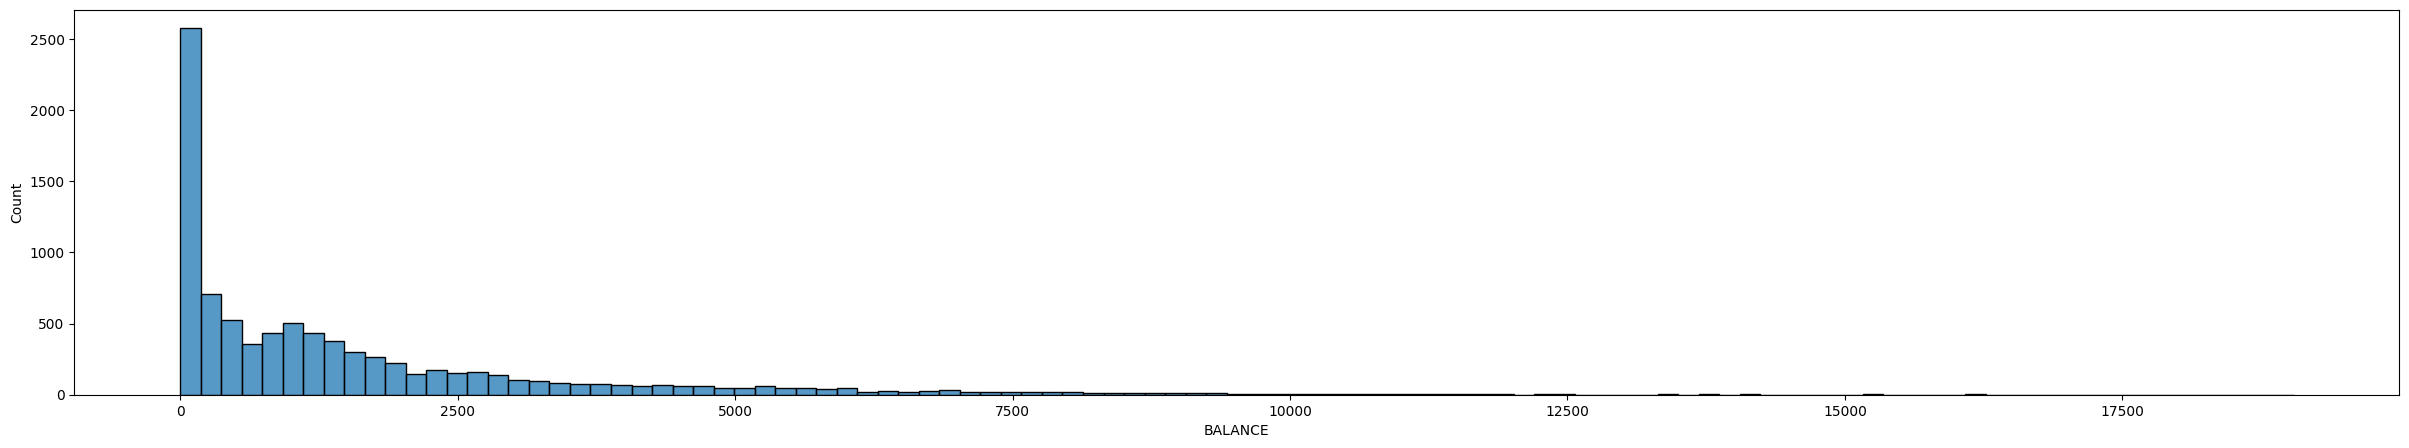

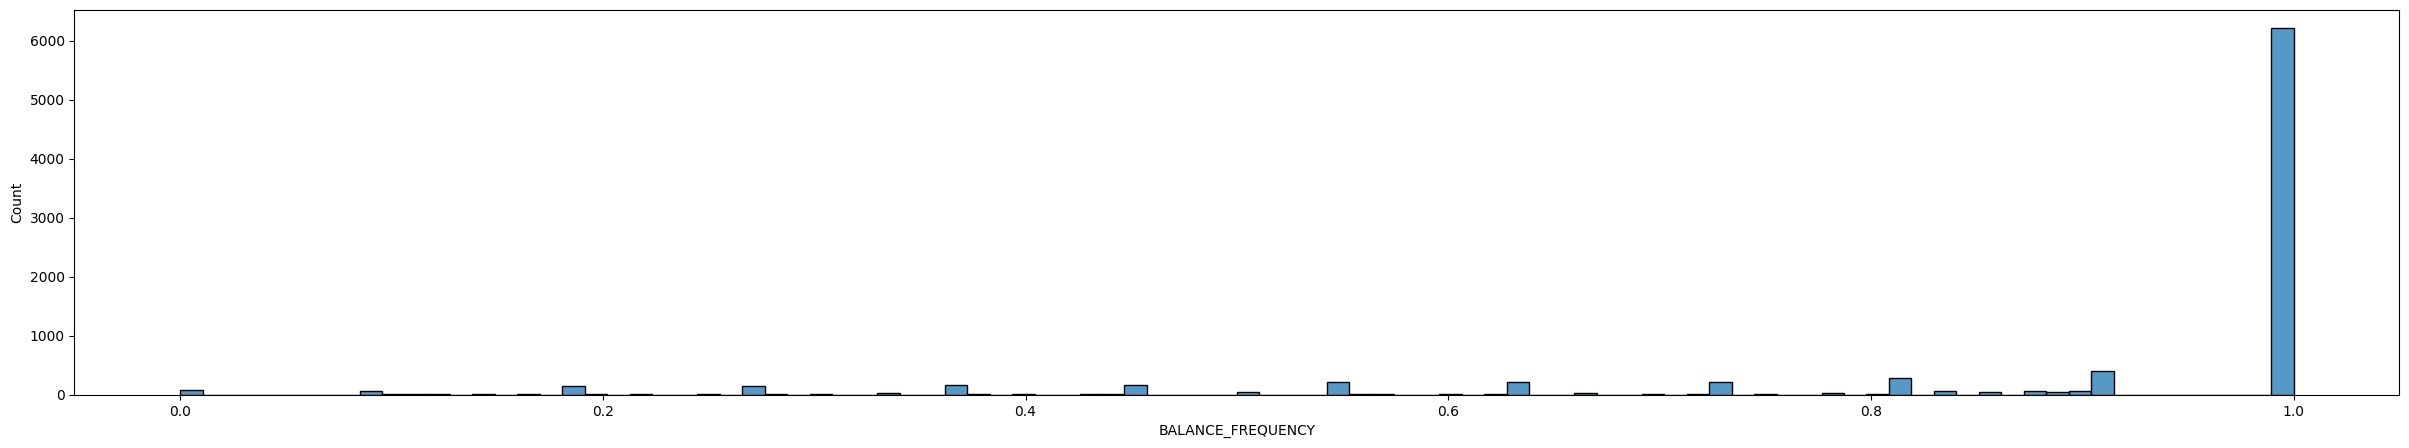

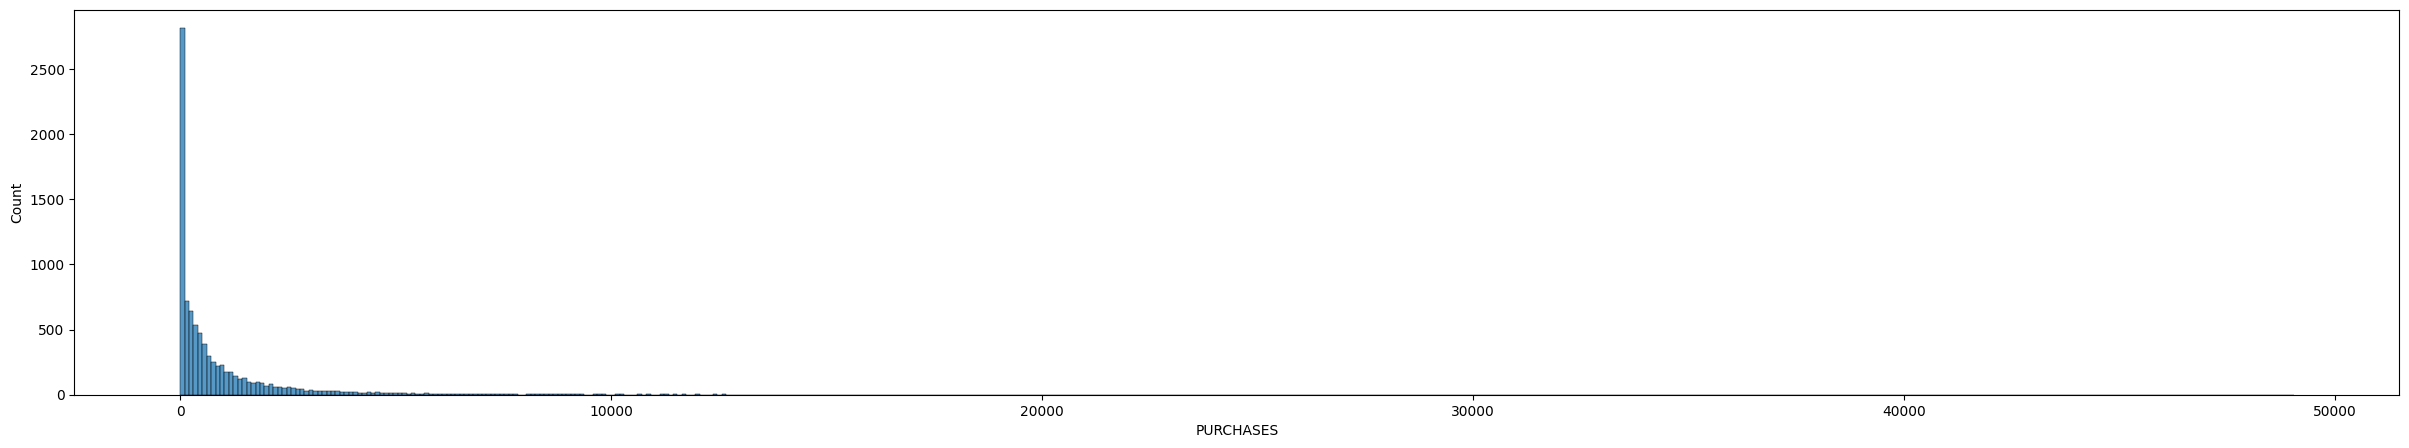

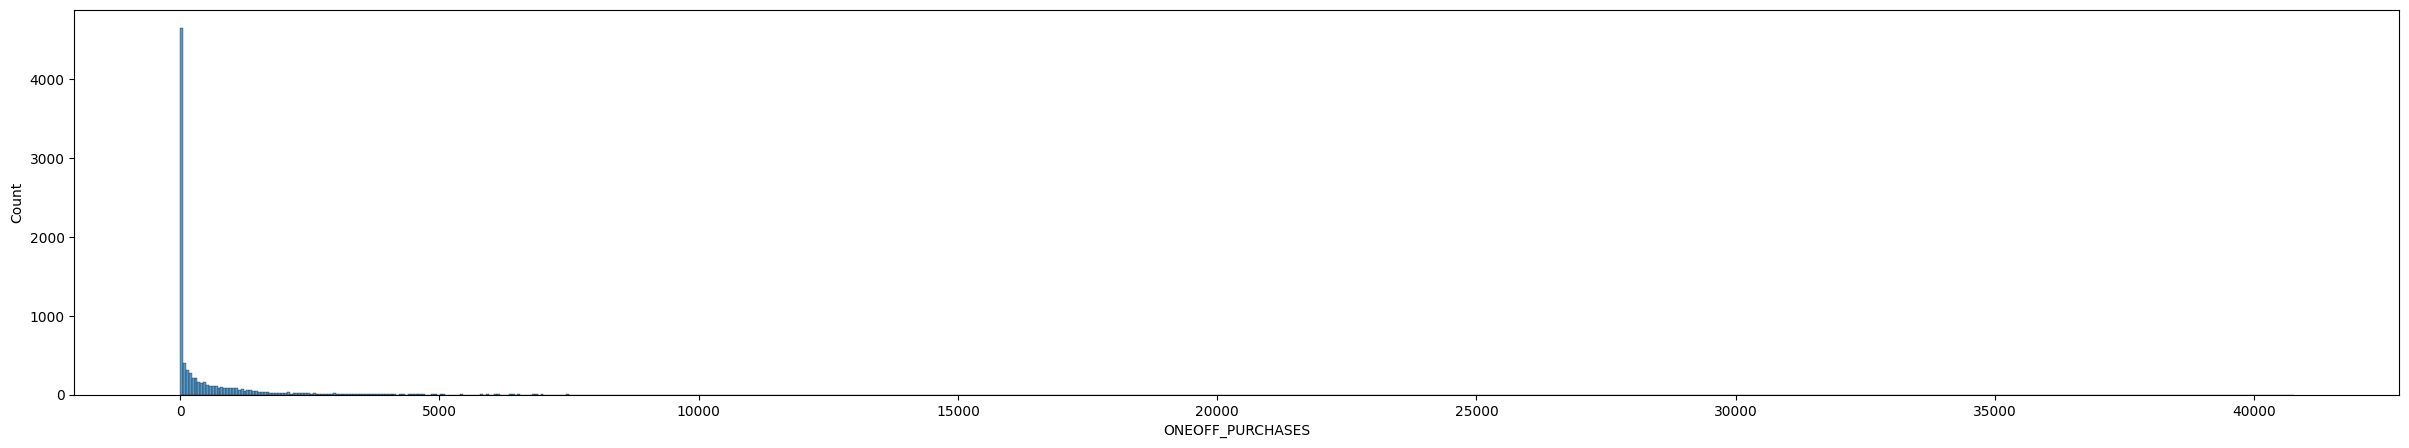

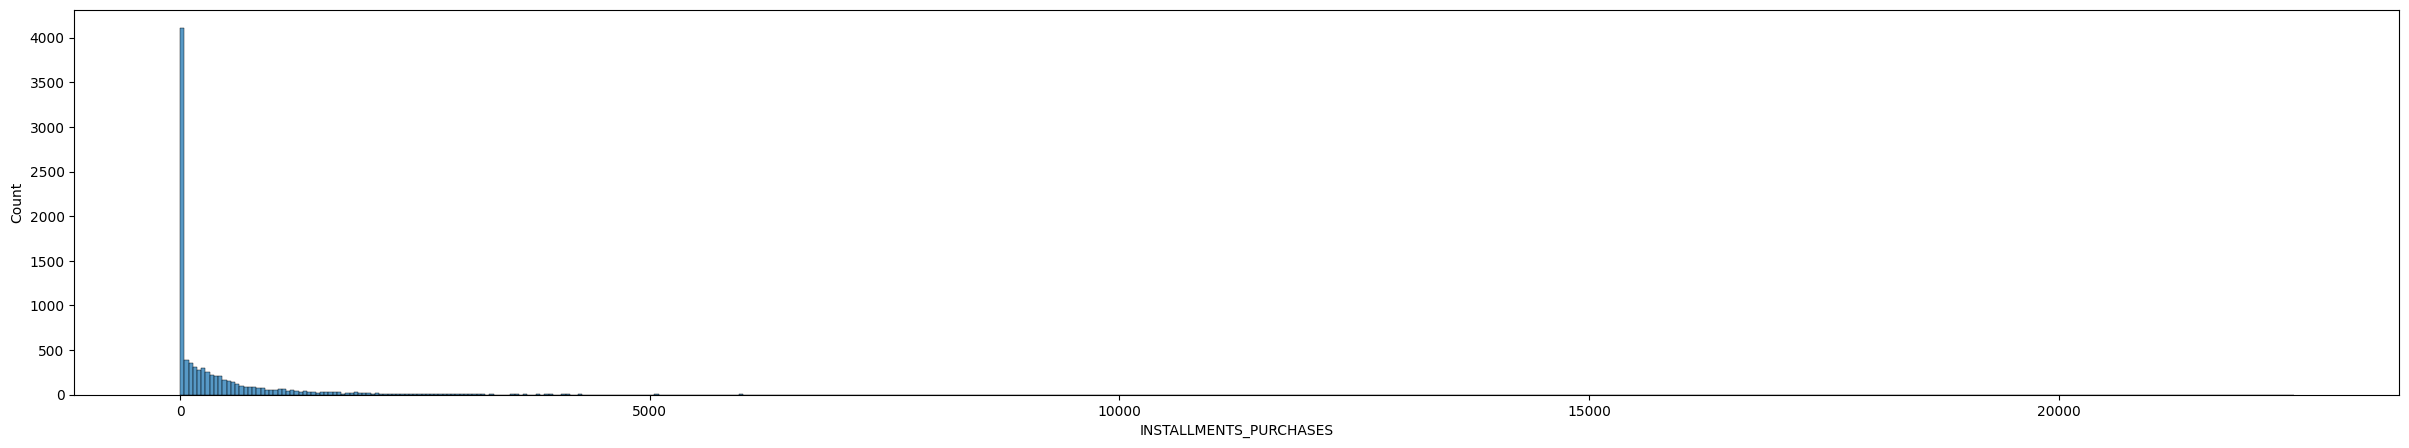

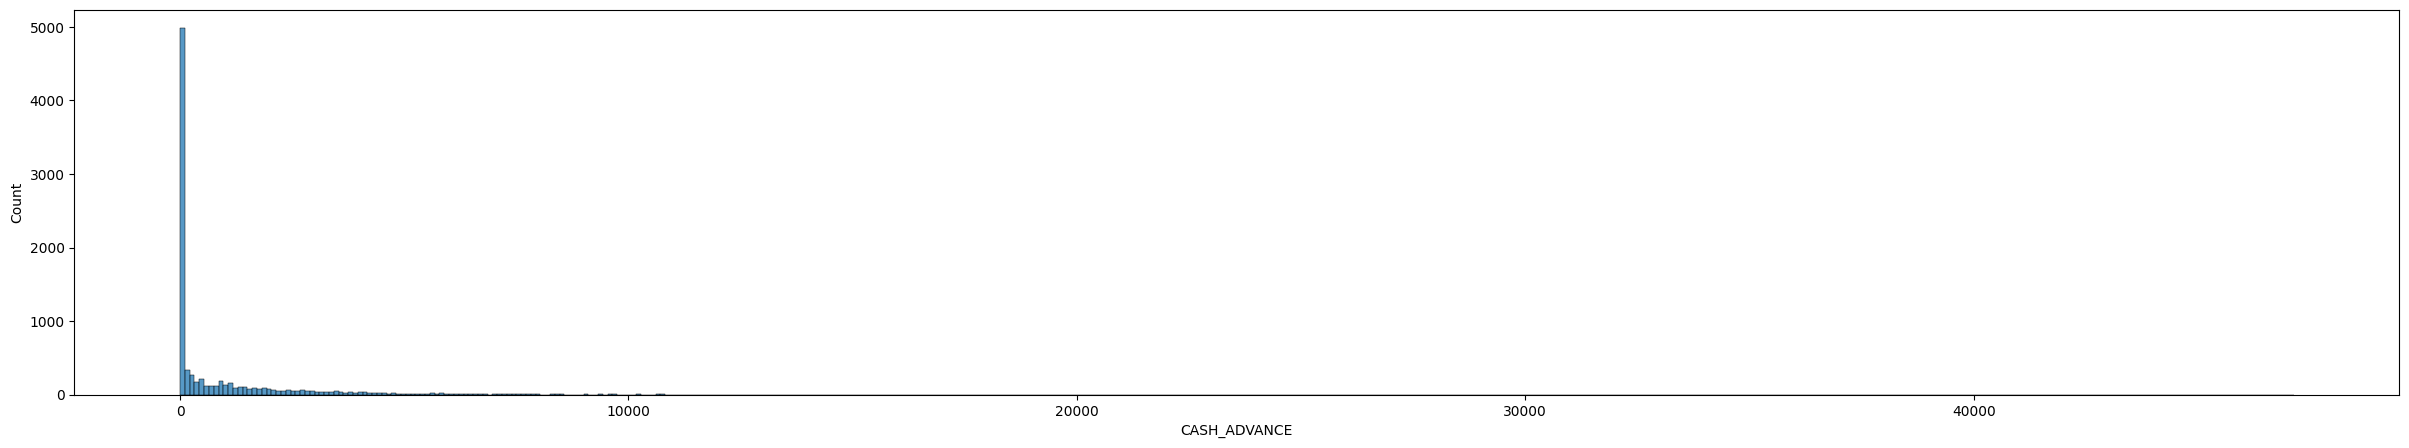

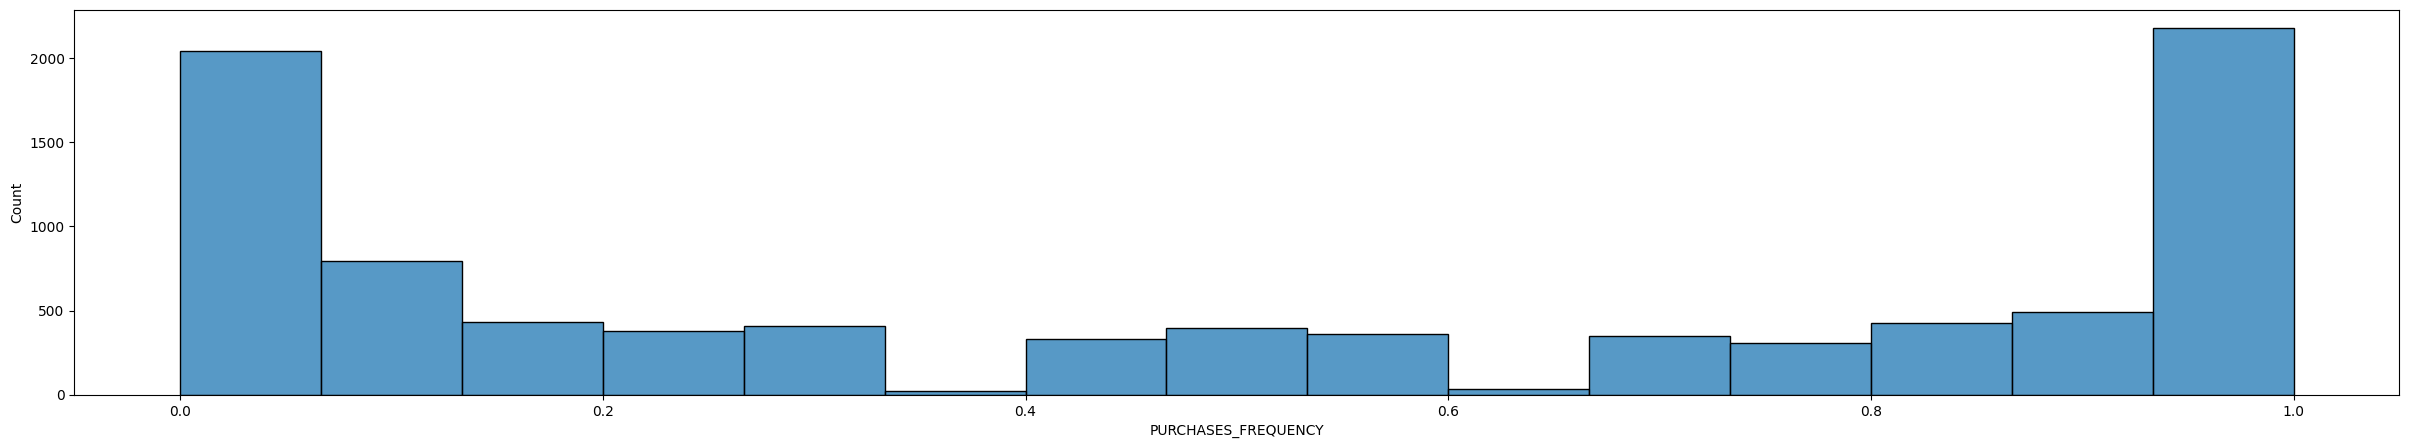

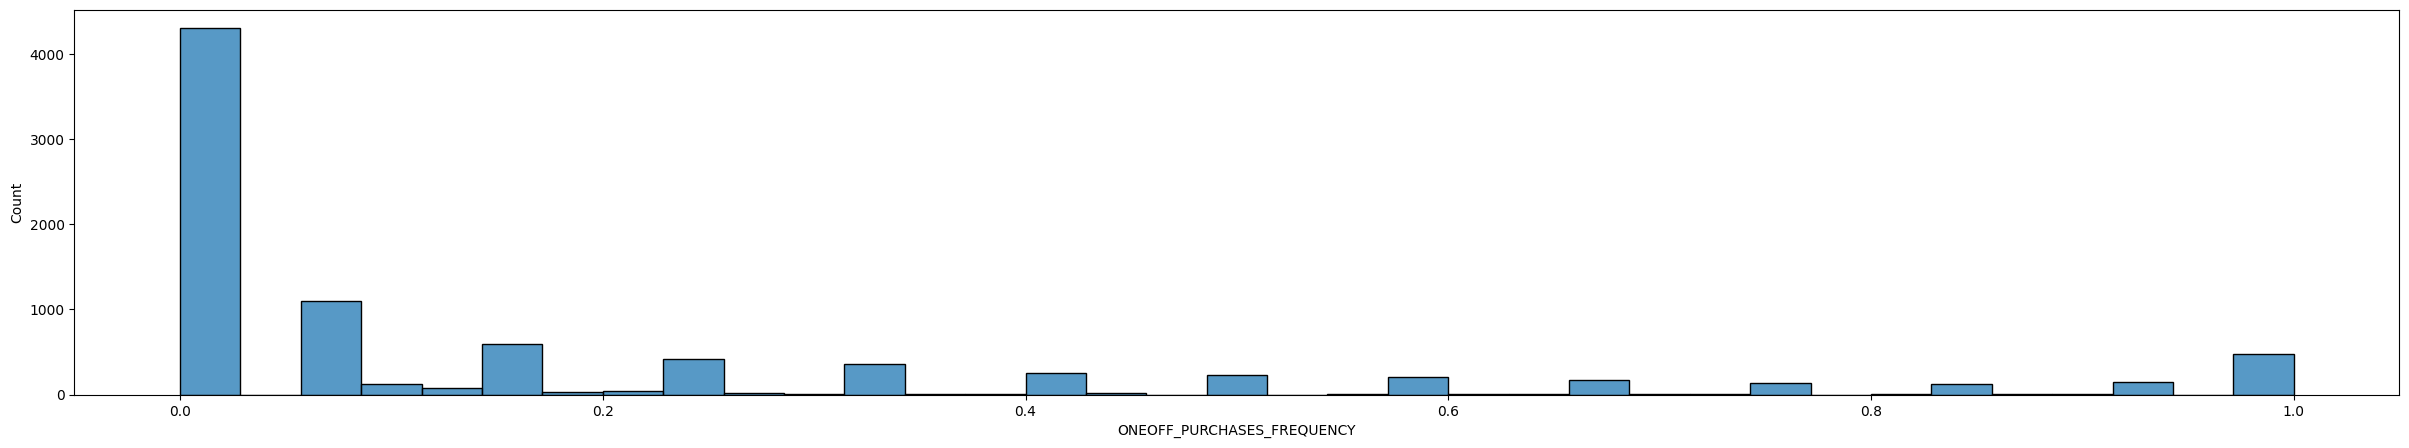

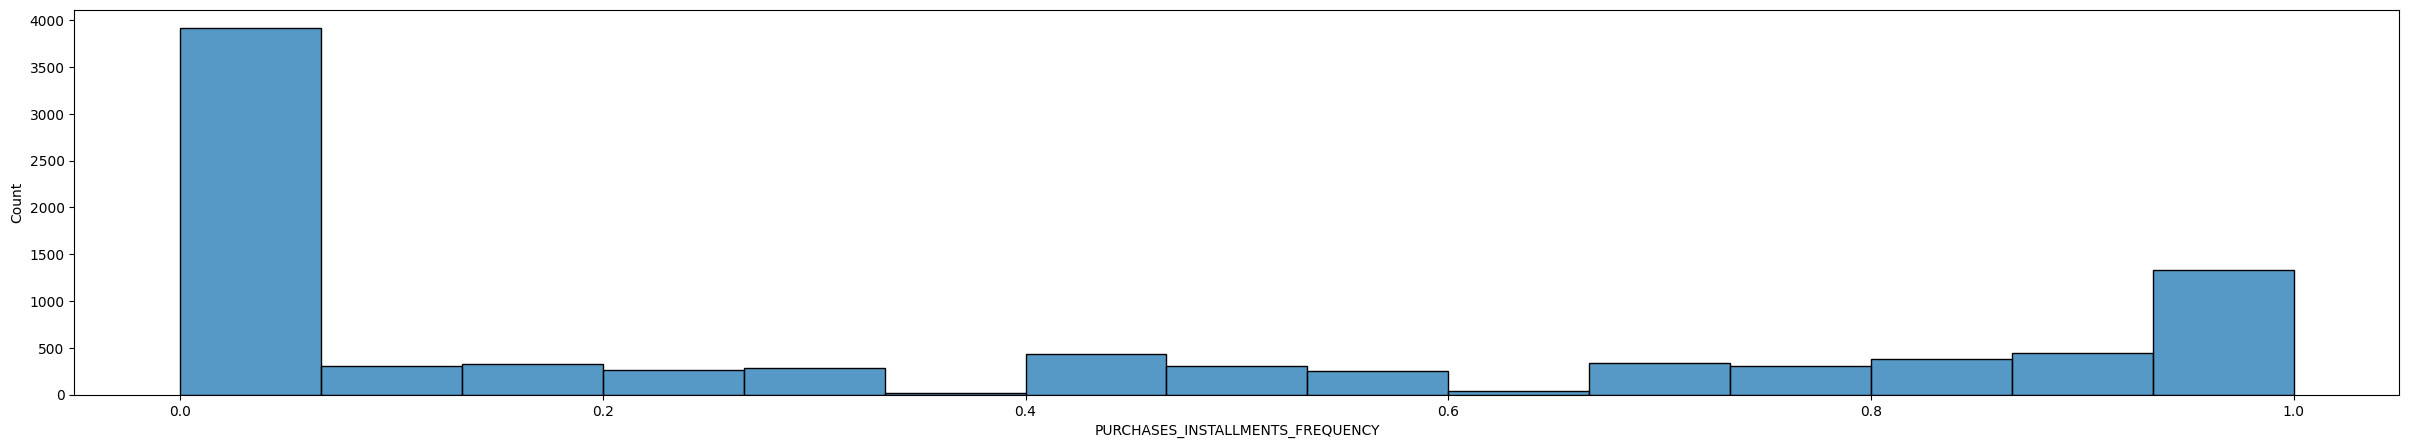

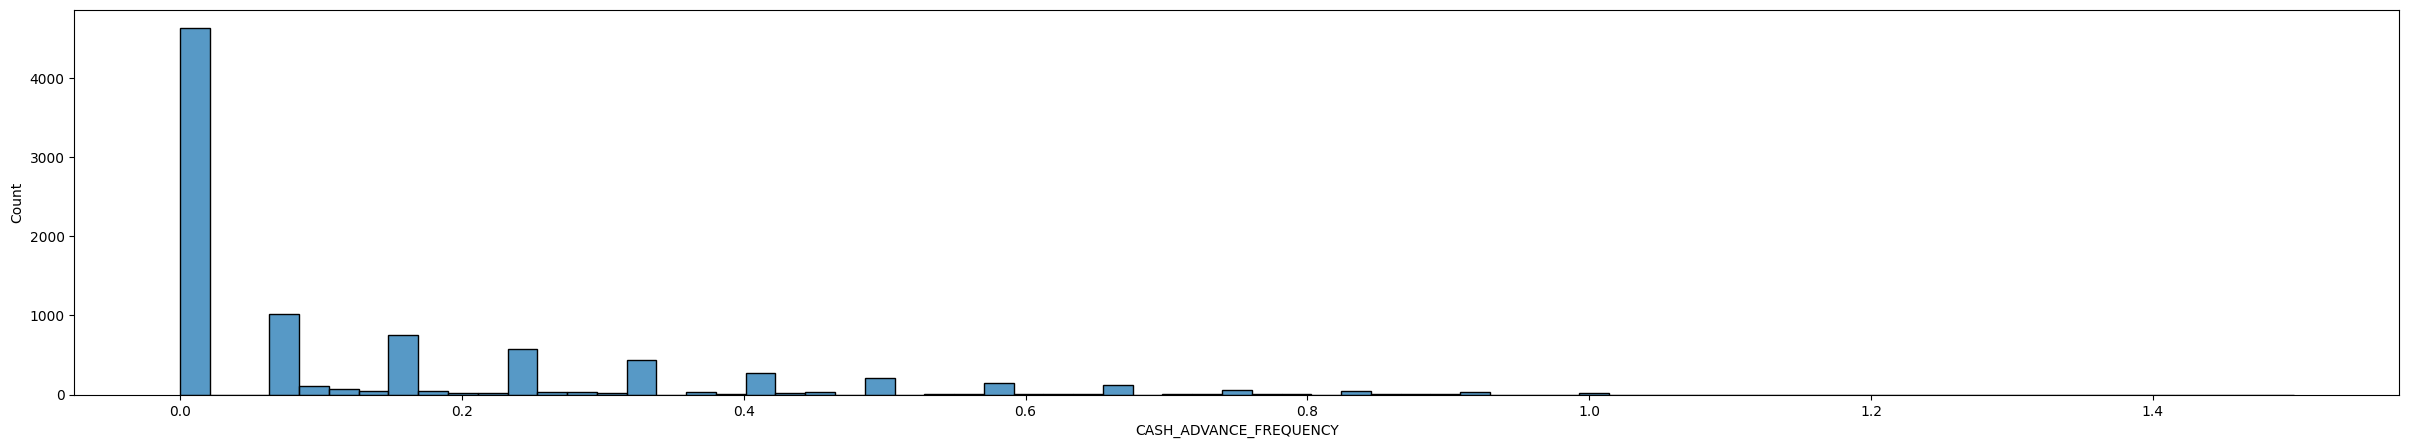

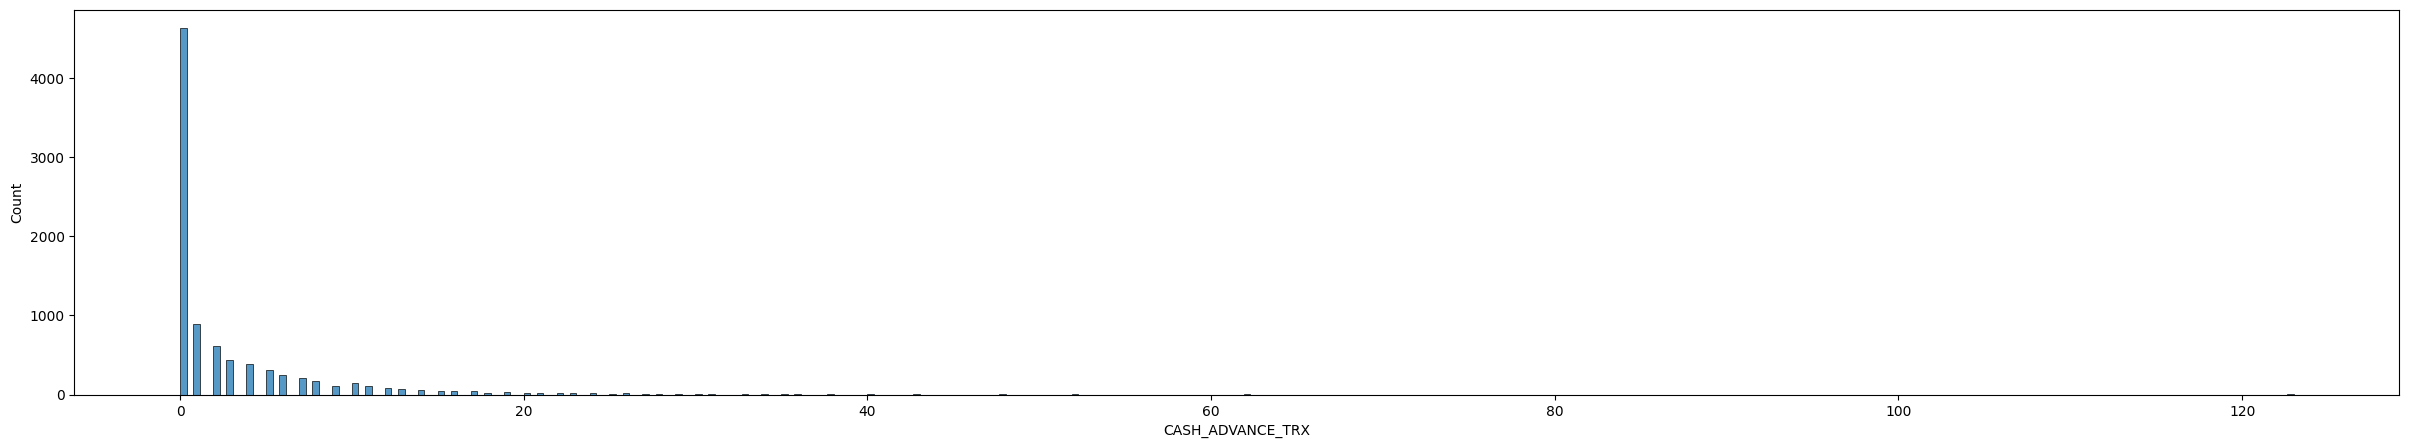

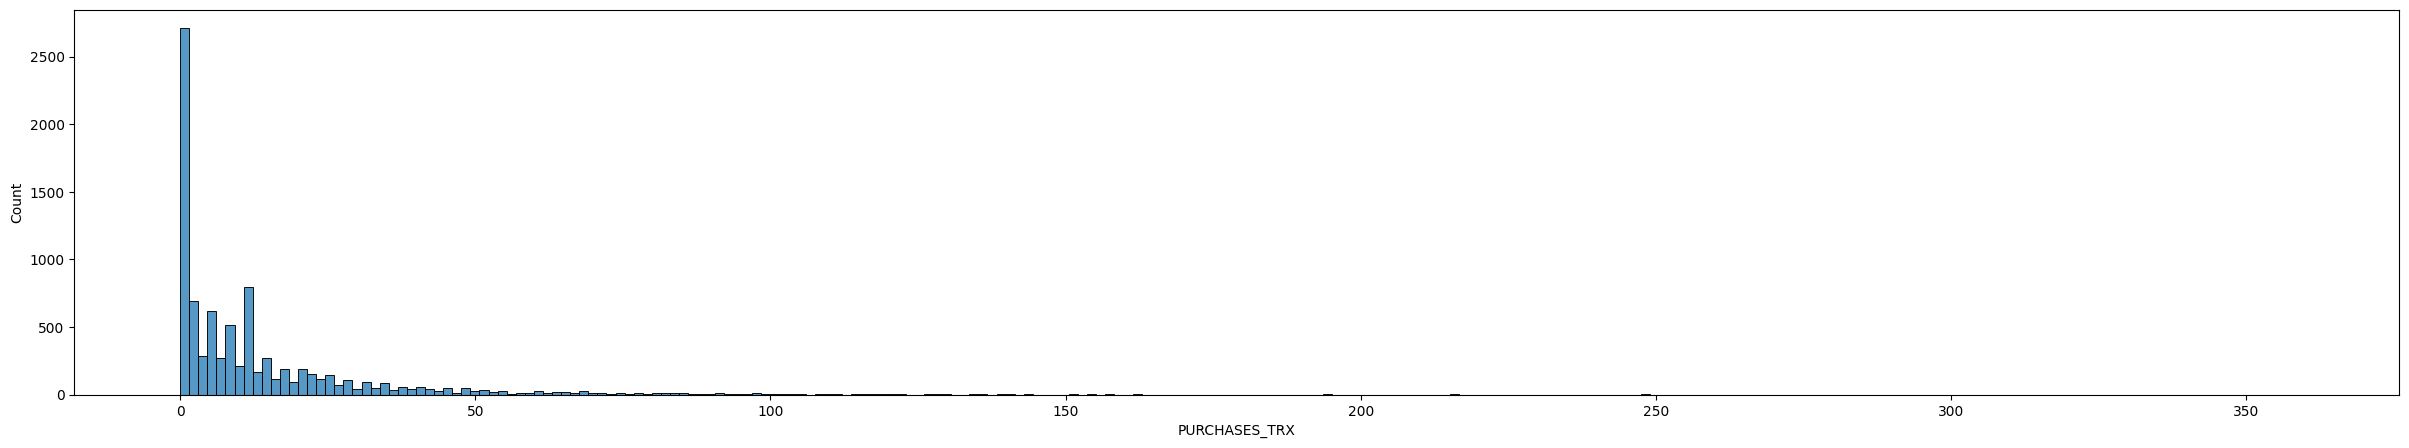

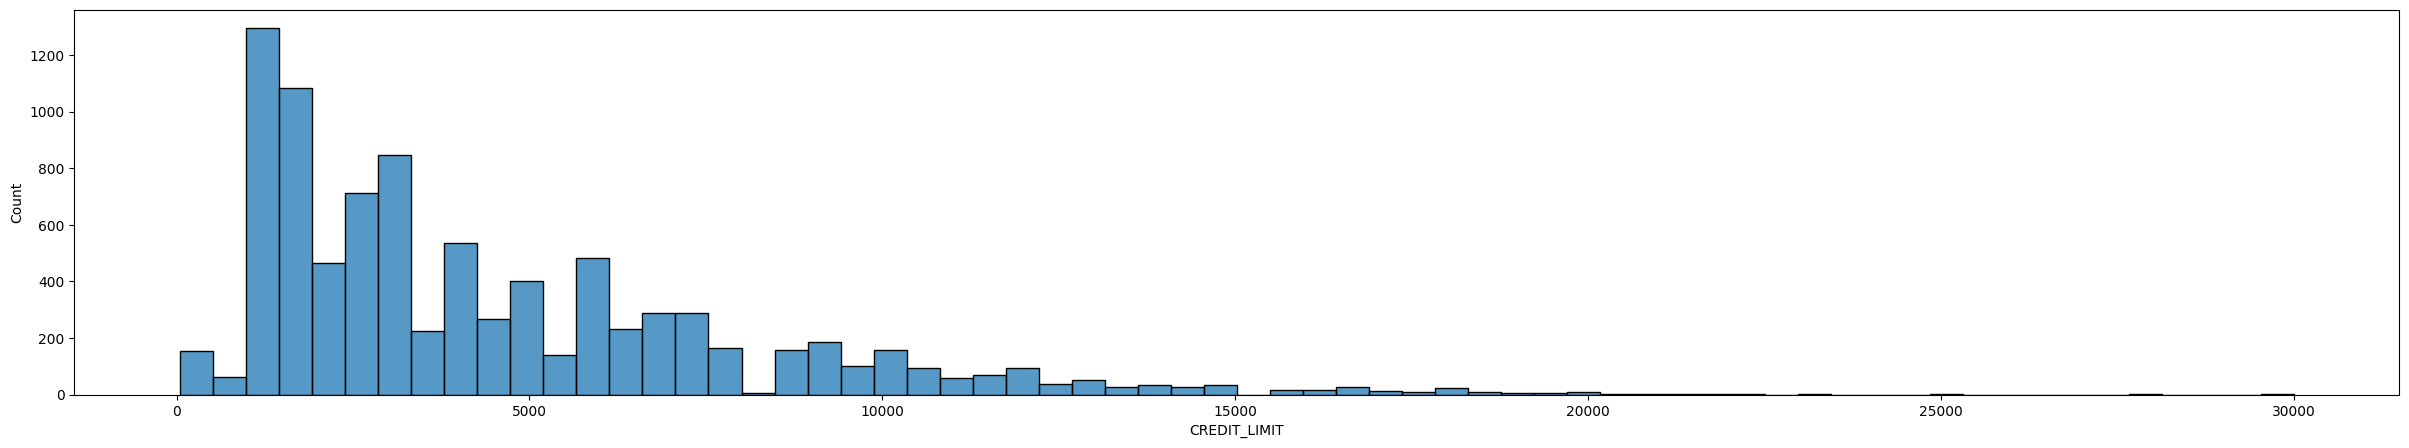

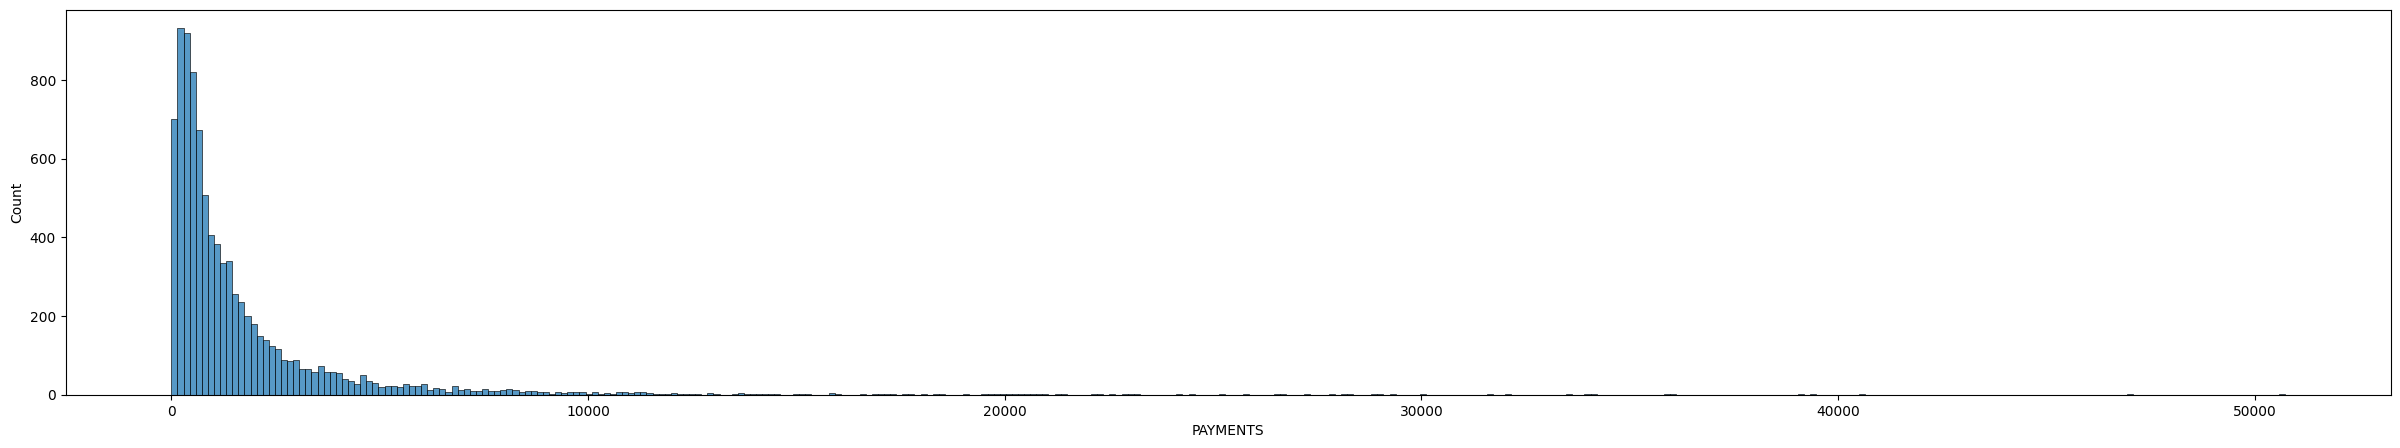

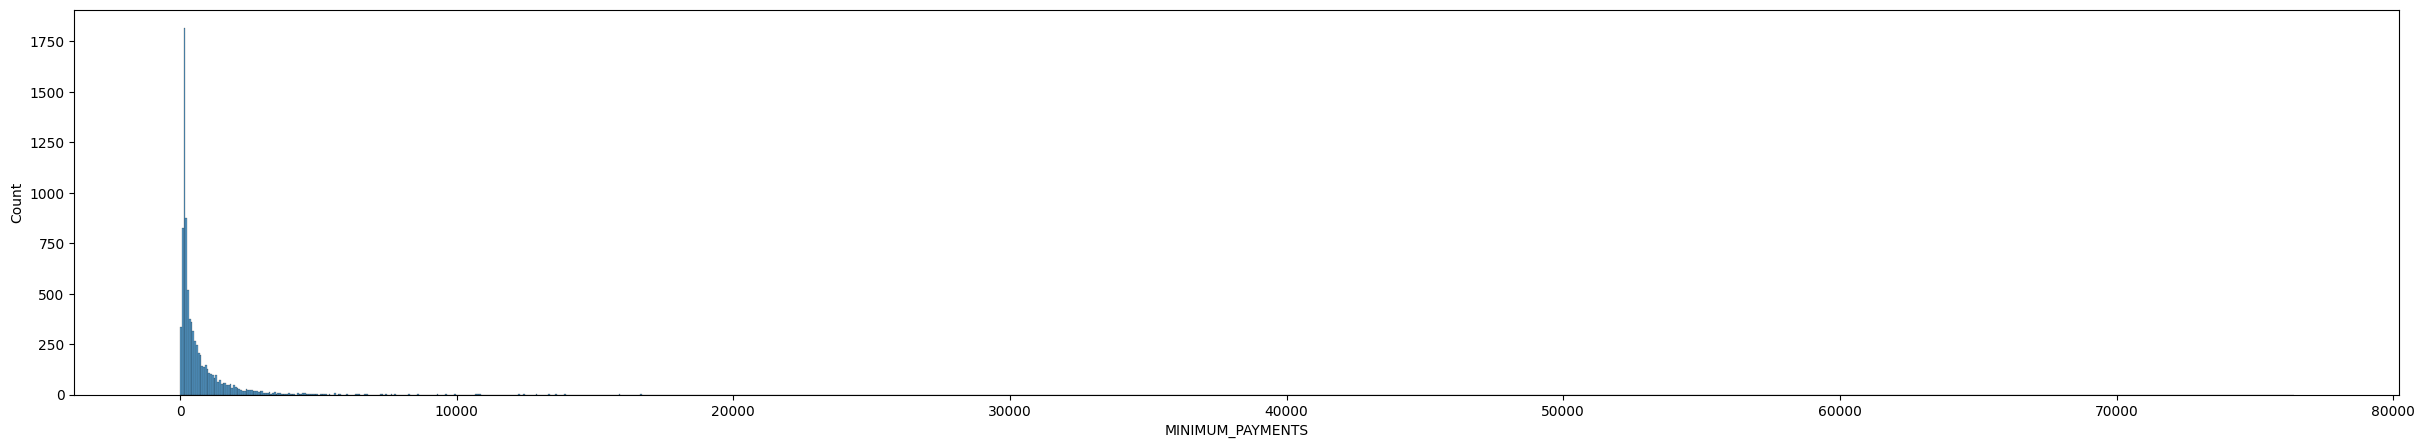

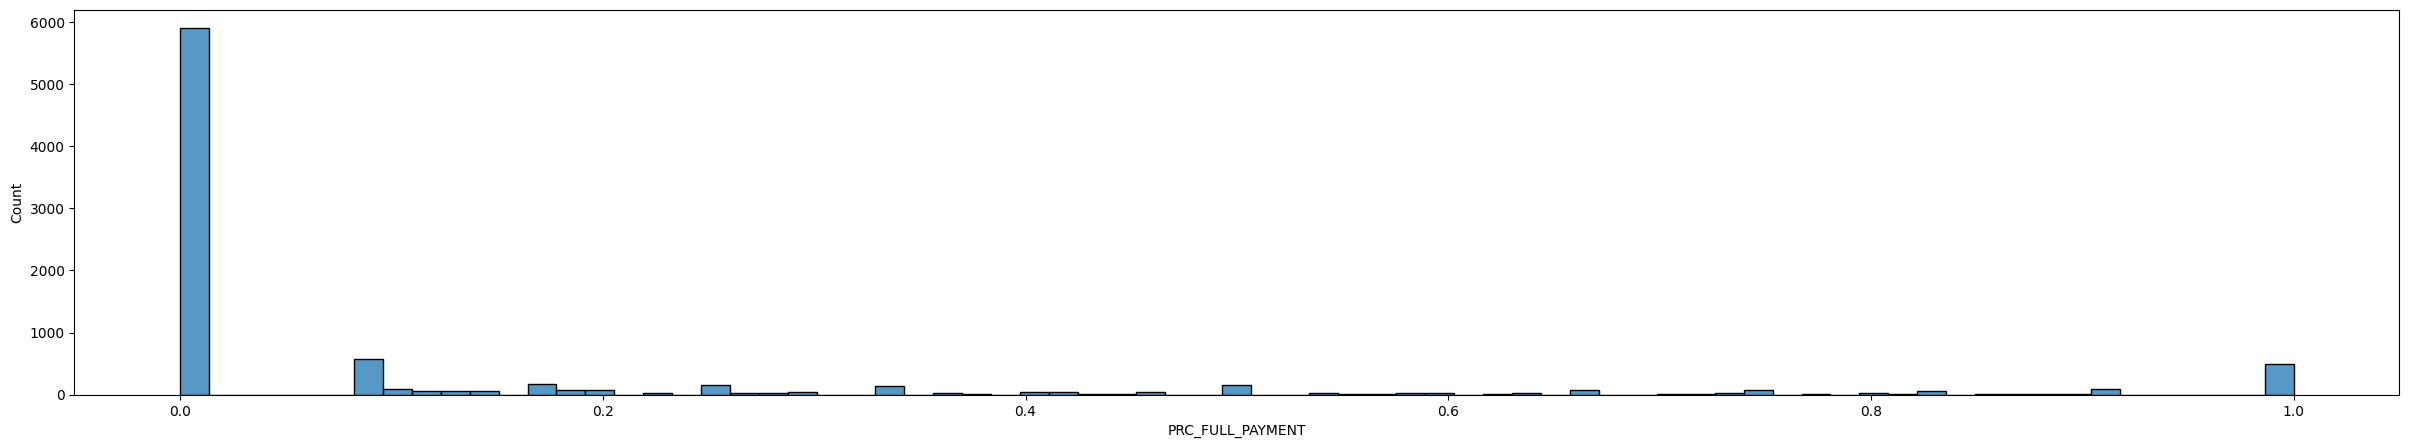

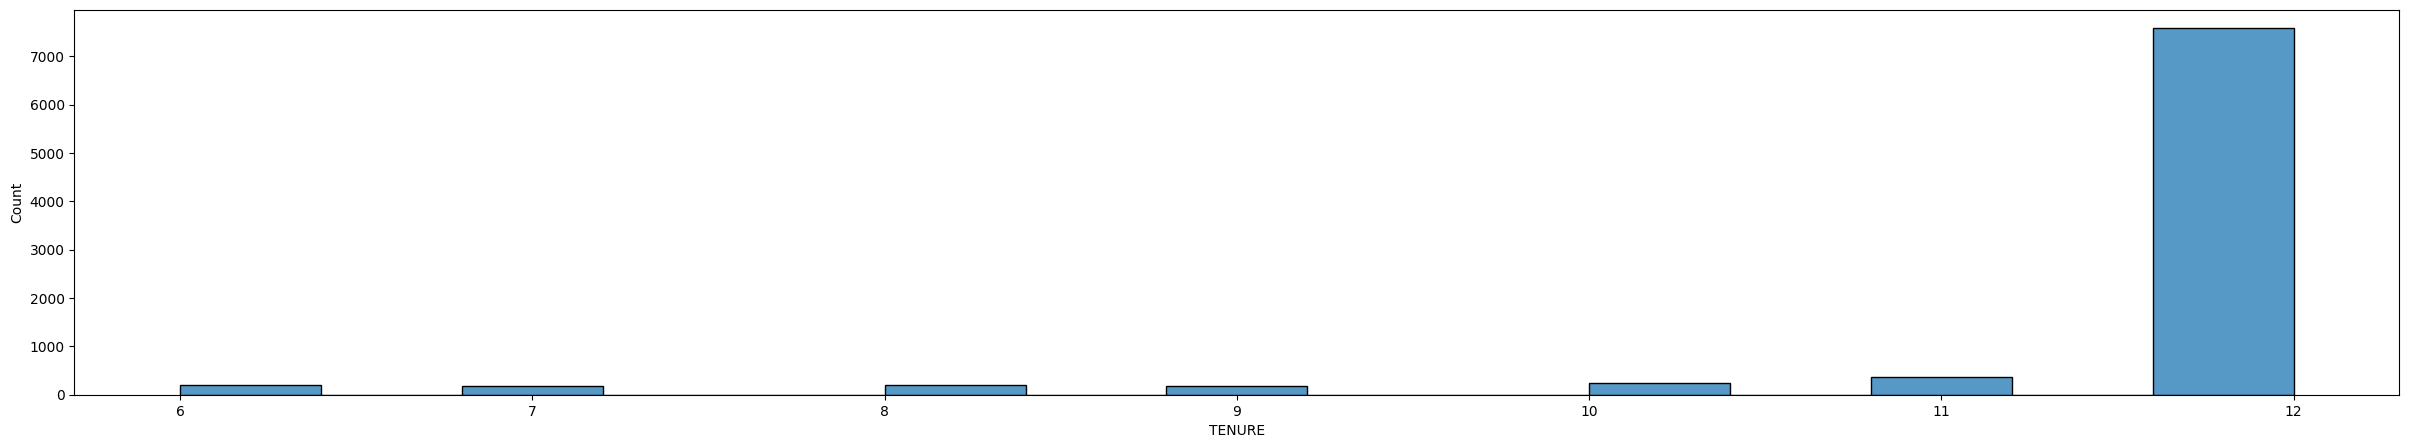

In [ ]:
for column in df.columns:
    plt.figure(figsize = (30,5))
    sns.histplot(df[column])
    plt.show()

Какие выводы можно сделать

Большинство держателей кредитных карт имеют низкий CREDIT_LIMIT и поддерживают BALANCE ниже 7500

Такие переменные, как PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES и CASH_ANDVANCE, также следуют той же тенденции, что и BALANCE. Все они могут быть связаны. То есть, поскольку BALANCE низкий, количество покупок также невелико и так далее

Большинство людей либо ничего не покупают, либо покупают очень часто

Людей, которые покупают в рассрочку, больше, чем людей, которые покупают сразу

За последние 6 месяцев большинство людей произвели общую сумму платежей ниже 10000, при минимальных платежах ниже 5000

Наконец, большинство держателей кредитных карт владеют картой более 12 месяцев

Дальше двумерный анализ подтвердит некоторое

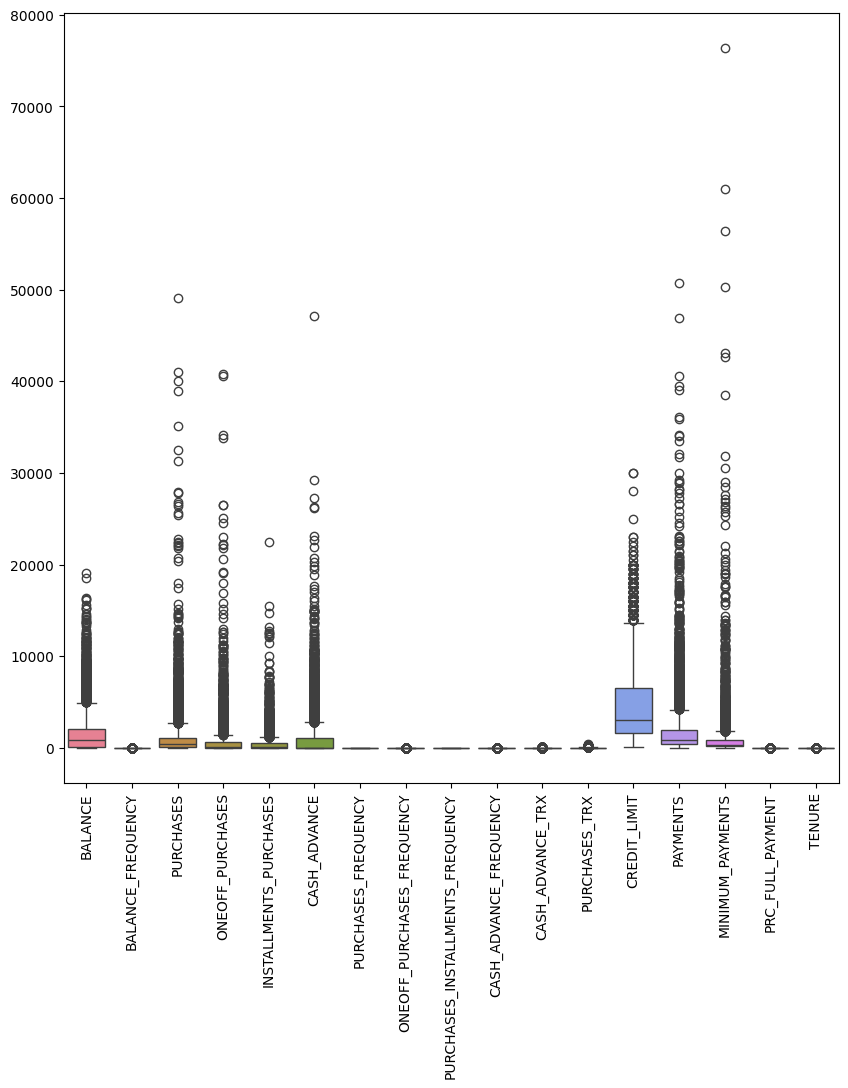

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

Тут видно, что выбросов много. Я бы не стал их удалять. Мы можем, основываясь на описании столбца, нормализовать данные и устранить асимметрию.

Столбец MINIMUM_PAYMENTS содержит много выбросов. И ещё я бы заменил пропуски медианой

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

X = df['MINIMUM_PAYMENTS'].values.reshape(-1,1)
X = imputer.fit_transform(X)

df['MINIMUM_PAYMENTS_NEW'] = X

In [ ]:
X2 = df['CREDIT_LIMIT'].values.reshape(-1,1)
X2 = imputer.fit_transform(X2)

df['CREDIT_LIMIT_NEW'] = X2

In [ ]:
df = df.drop(['CREDIT_LIMIT','MINIMUM_PAYMENTS'],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  PAYMEN

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
from sklearn.preprocessing import MinMaxScaler

names = df.columns
indexes = df.index
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)
data_scaled = pd.DataFrame(df, columns=names, index=indexes)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS_NEW,CREDIT_LIMIT_NEW
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.003979,0.000000,1.0,0.001826,0.031720
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.080893,0.222222,1.0,0.014034,0.232053
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.012264,0.000000,1.0,0.008210,0.248748
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.000000,0.000000,1.0,0.004088,0.248748
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.013374,0.000000,1.0,0.003204,0.038397


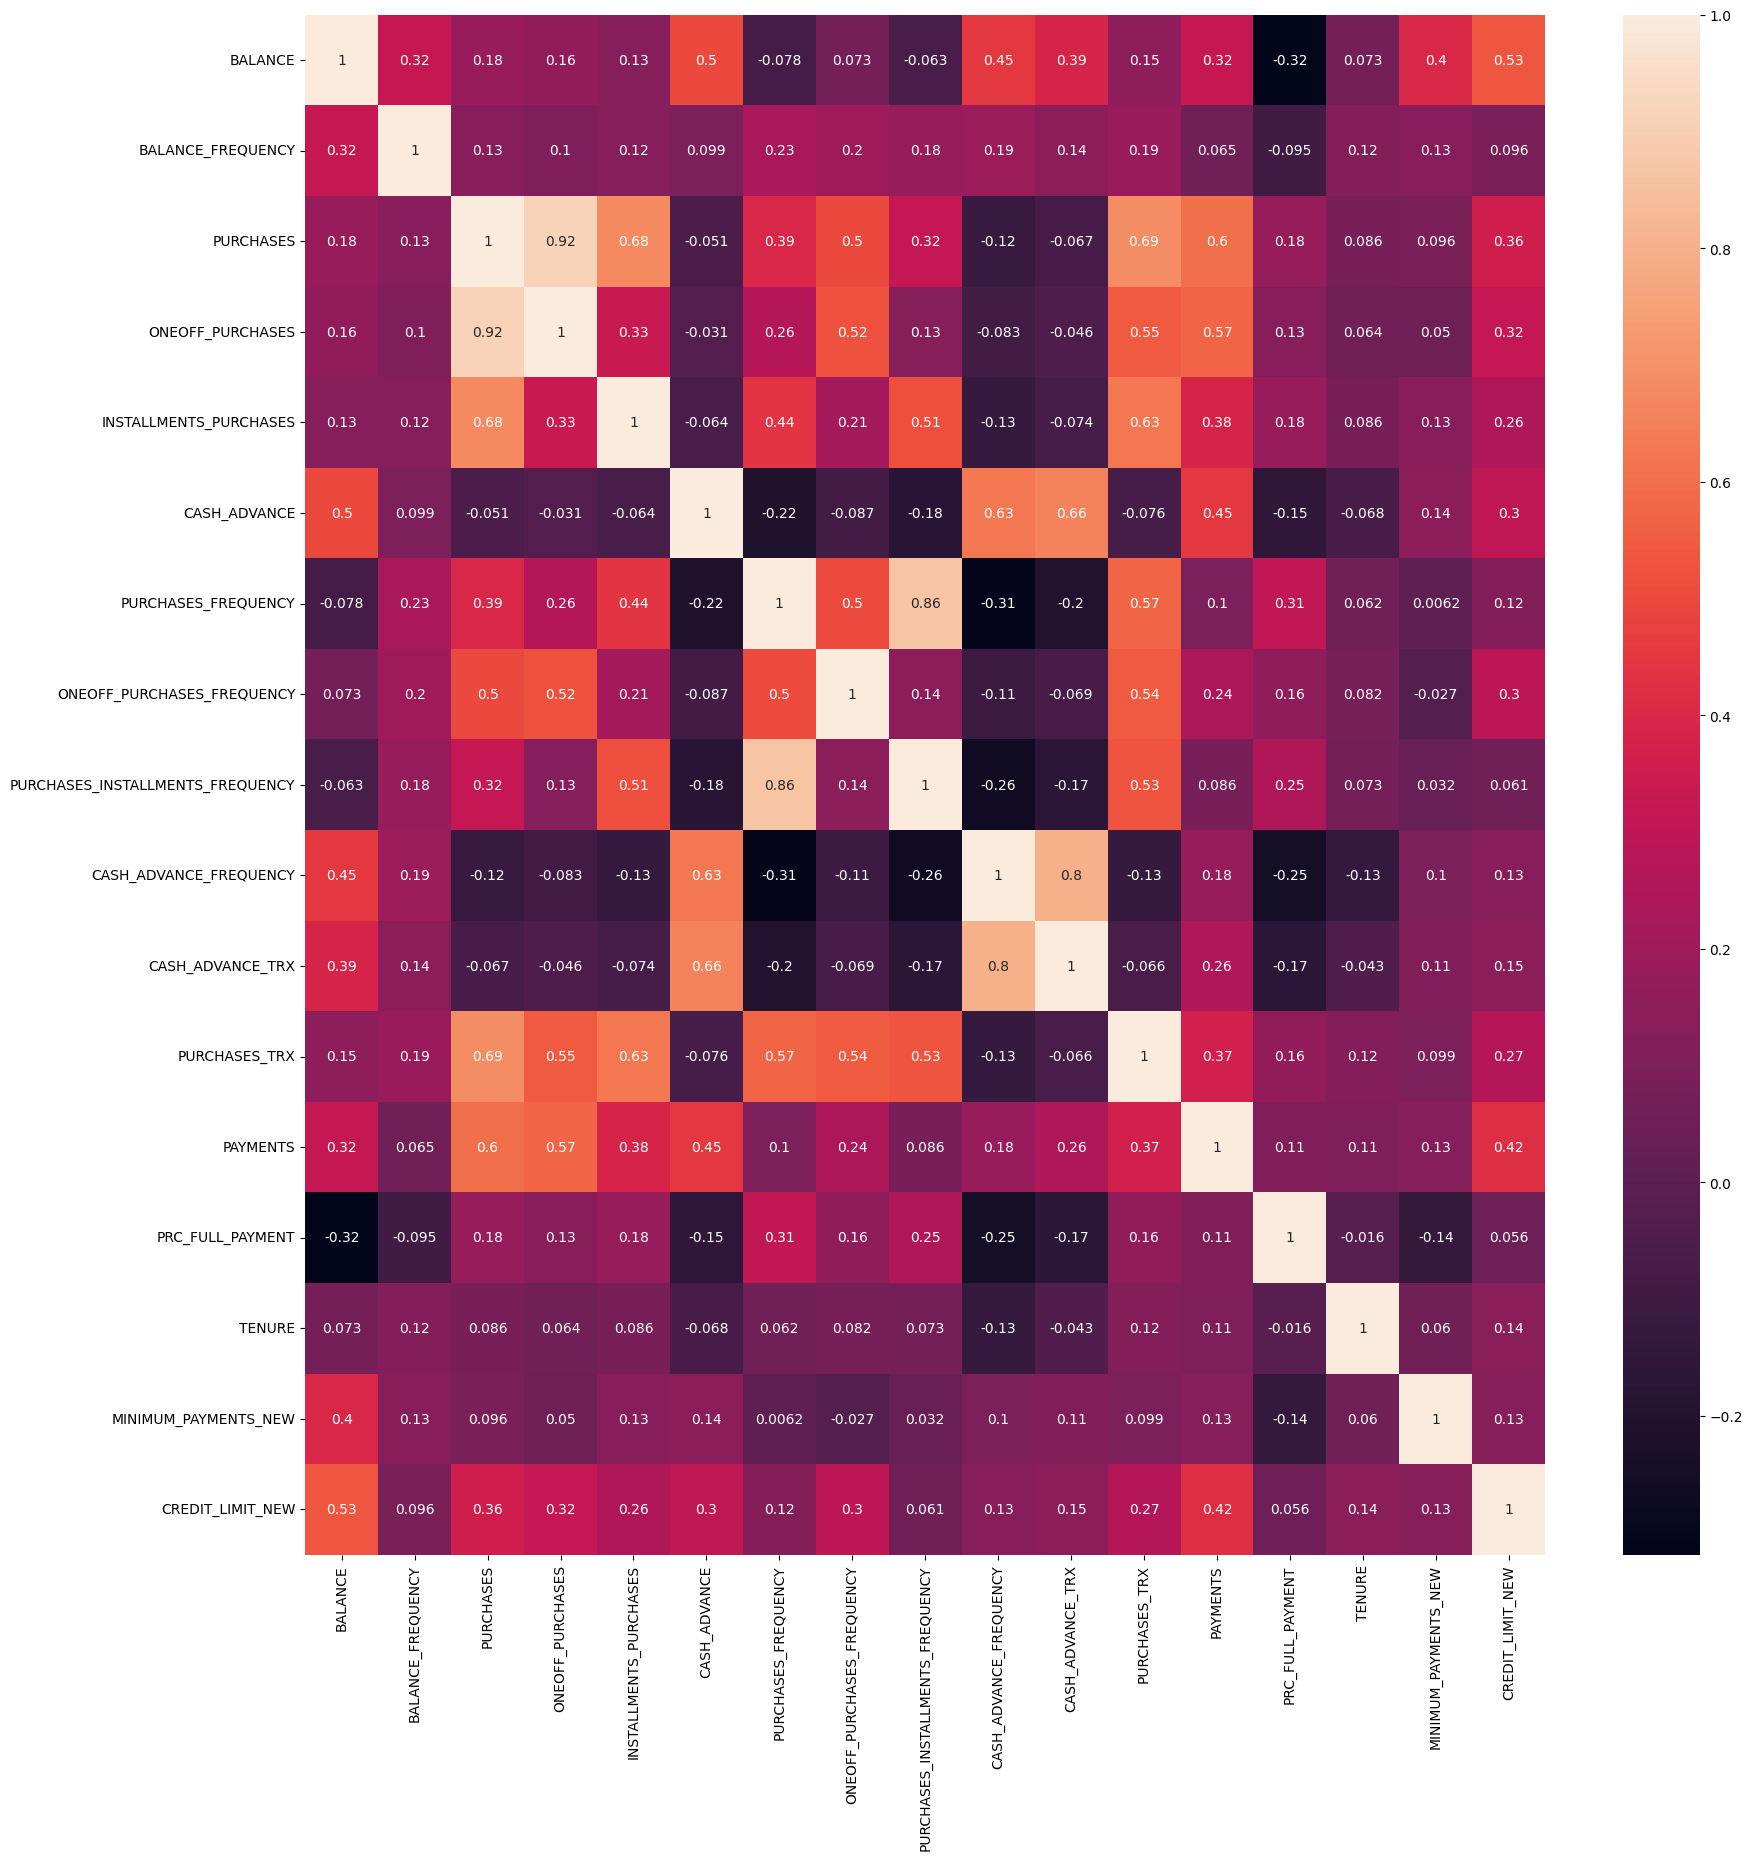

In [ ]:
plt.figure(figsize=(20,20))
corr_df = data_scaled.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

In [ ]:
cor_target = corr_df["BALANCE"]
relevant_features = cor_target[cor_target>0.5]
relevant_features_reverse = cor_target[cor_target<-0.2]
print(relevant_features)
print(relevant_features_reverse)

BALANCE             1.000000
CREDIT_LIMIT_NEW    0.531296
Name: BALANCE, dtype: float64
PRC_FULL_PAYMENT   -0.318959
Name: BALANCE, dtype: float64


In [ ]:
data_scaled[['BALANCE', 'CREDIT_LIMIT_NEW', 'PRC_FULL_PAYMENT']]

,BALANCE,CREDIT_LIMIT_NEW,PRC_FULL_PAYMENT
0,0.002148,0.031720,0.000000
1,0.168169,0.232053,0.222222
2,0.131026,0.248748,0.000000
3,0.087521,0.248748,0.000000
4,0.042940,0.038397,0.000000
...,...,...,...
8945,0.001496,0.031720,0.500000
8946,0.001007,0.031720,0.000000
8947,0.001229,0.031720,0.250000
8948,0.000707,0.015025,0.250000


In [ ]:
from sklearn.model_selection import train_test_split

y = data_scaled.BALANCE
X = data_scaled.drop('BALANCE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test

(7055    0.008744
 4580    0.171255
 8545    0.027751
 4463    0.001304
 5705    0.188987
           ...   
 5734    0.056666
 5191    0.043771
 5390    0.002113
 860     0.000000
 7270    0.027961
 Name: BALANCE, Length: 7160, dtype: float64,
 7669    0.000884
 6125    0.028358
 7028    0.006261
 3019    0.046950
 3479    0.067959
           ...   
 1928    0.077178
 3817    0.086186
 8156    0.000294
 7691    0.000878
 5026    0.240877
 Name: BALANCE, Length: 1790, dtype: float64)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

y = data_scaled.BALANCE
X = data_scaled.drop('BALANCE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def compute_regression(X, y):
  # Создание и обучение модели линейной регрессии
  model = LinearRegression()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # Оценка качества модели
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }

In [ ]:
model = compute_regression(X_train, y_train) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)

{'MAE': 0.04603672607109996,
 'MSE': 0.004565513470771659,
 'R2': 0.6262249177798598,
 'mape (reverted - % верно угаданых)': -119535447402826.3,
 'mape (original - % ошибок)': 119535447402926.3}

In [ ]:
model = compute_regression(X_train, y_train) # Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

compute_metrics(y_test, y_pred)

{'MAE': 0.0444089662371302,
 'MSE': 0.004210910647090686,
 'R2': 0.6126665196797082,
 'mape (reverted - % верно угаданых)': -98827585850507.89,
 'mape (original - % ошибок)': 98827585850607.89}

In [ ]:
coefficients = model.coef_
coefficients

array([ 0.08179572,  3.36786081, -2.62696685, -1.47642126,  0.54080123,
       -0.00828142, -0.02412676, -0.00627243,  0.17778064, -0.13669307,
        0.15485233, -0.1082546 , -0.08051454,  0.00570784,  0.84198706,
        0.3667848 ])

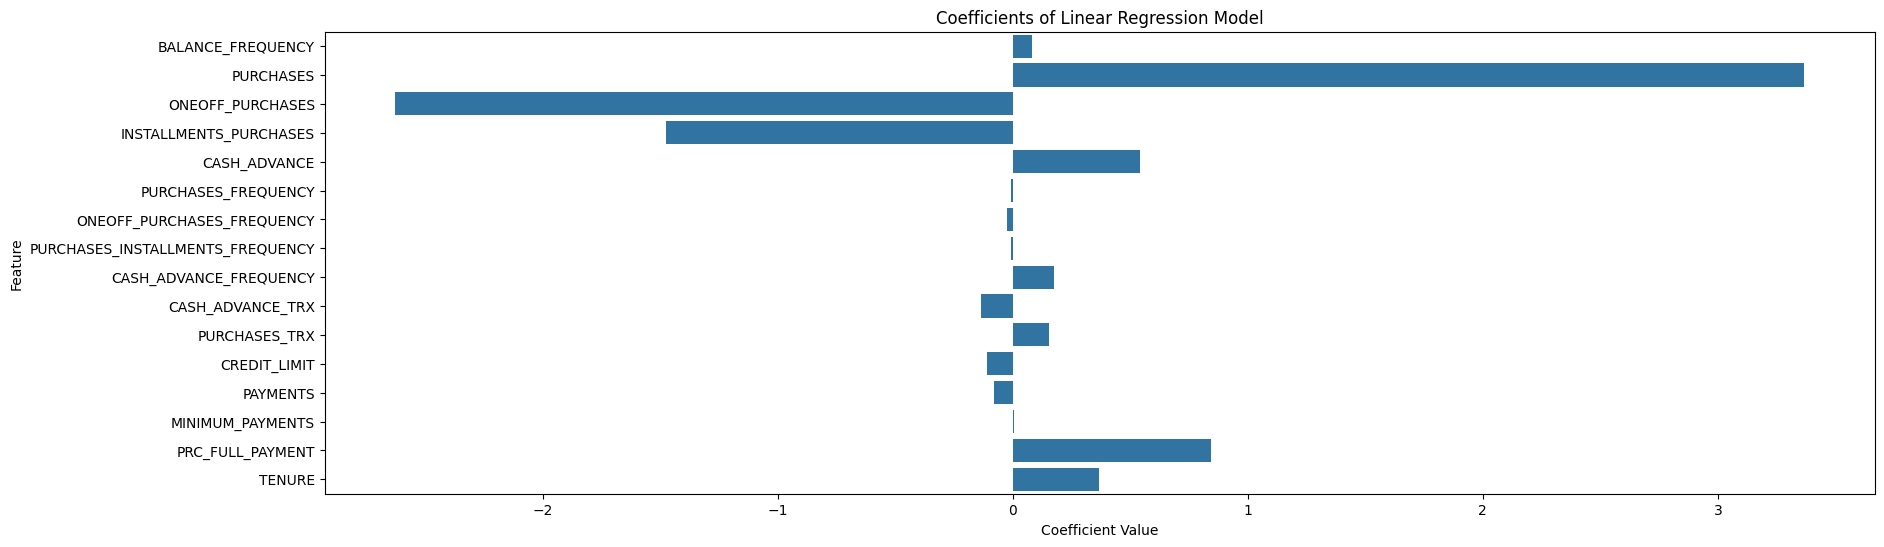

In [ ]:
# Получение коэффициентов линейной регрессии
coefficients = model.coef_
intercept = model.intercept_

# Названия признаков
feature_names = ['BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',	'CASH_ADVANCE_TRX',	'PURCHASES_TRX',	'CREDIT_LIMIT',	'PAYMENTS',	'MINIMUM_PAYMENTS',	'PRC_FULL_PAYMENT',	'TENURE']

# Визуализация коэффициентов
plt.figure(figsize=(20, 6))
sns.barplot(x=coefficients, y=feature_names)
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [ ]:
formula = str(round(intercept,2))
for coef, name_per in zip(coefficients,feature_names):
  formula+=f' + {coef:.2f}*{name_per}'
'y = '+formula

'y = -0.06 + 0.08*BALANCE_FREQUENCY + 3.37*PURCHASES + -2.63*ONEOFF_PURCHASES + -1.48*INSTALLMENTS_PURCHASES + 0.54*CASH_ADVANCE + -0.01*PURCHASES_FREQUENCY + -0.02*ONEOFF_PURCHASES_FREQUENCY + -0.01*PURCHASES_INSTALLMENTS_FREQUENCY + 0.18*CASH_ADVANCE_FREQUENCY + -0.14*CASH_ADVANCE_TRX + 0.15*PURCHASES_TRX + -0.11*CREDIT_LIMIT + -0.08*PAYMENTS + 0.01*MINIMUM_PAYMENTS + 0.84*PRC_FULL_PAYMENT + 0.37*TENURE'

In [ ]:
import numpy as np
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances

def knn_regressor(X_train, y_train, X_test, k=5):
    """
    Простая реализация KNN регрессии.

    Параметры:
    X_train: np.array - обучающий набор признаков
    y_train: np.array - обучающий набор целевой переменной
    X_test: np.array - тестовый набор признаков
    k: int - количество соседей

    Возвращает:
    y_pred: np.array - предсказанные значения для тестового набора
    """

    # Рассчитываем метрику расстояния (для примера - Евклидово расстояние)
    #от каждой тестовой точки до всех точек обучающего набора
    distances = euclidean_distances(X_test, X_train)

    # Инициализация массива для предсказаний
    y_pred = np.zeros(len(X_test))

    # Цикл по всем тестовым точкам
    for i in range(0, len(X_test)):
      test_point = X_test.iloc[i].to_numpy()
      neighbors = np.argsort(distances[i])[:k]
      y_pred[i] = np.mean(y_train[neighbors])

    return y_pred

# Пример использования функции:
# X_train, y_train, X_test уже должны быть определены


y_pred = knn_regressor(X_train, y_train.to_numpy(), X_test, k=3)
compute_metrics(y_test, y_pred)

{'MAE': 0.037327894029697245,
 'MSE': 0.004473666310639056,
 'R2': 0.5884973852179324,
 'mape (reverted - % верно угаданых)': -1472544620114.9497,
 'mape (original - % ошибок)': 1472544620214.9497}

In [ ]:
pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})

,y_pred,y_test
7669,0.004058,0.000884
6125,0.058145,0.028358
7028,0.044521,0.006261
3019,0.059792,0.046950
3479,0.054145,0.067959
...,...,...
1928,0.076530,0.077178
3817,0.057407,0.086186
8156,0.000017,0.000294
7691,0.002999,0.000878


##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, manhattan_distances

class MyLinearRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000, early_stopping_threshold=1e-5, early_stopping_patience=5):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.early_stopping_threshold = early_stopping_threshold
        self.early_stopping_patience = early_stopping_patience

    def fit(self, X, y):
        m = len(y)
        X = np.c_[np.ones(m), X]  # Добавляем колонку для intercept
        n_features = X.shape[1]

        self.theta = np.zeros(n_features)
        self.unchanged_count = 0

        for iteration in range(self.max_iter):
            gradients = -2/m * X.T.dot(y - X.dot(self.theta))
            prev_theta = self.theta.copy()
            self.theta -= self.learning_rate * gradients

            # Проверка на изменение коэффициентов
            if np.linalg.norm(prev_theta - self.theta) < self.early_stopping_threshold:
                self.unchanged_count += 1
            else:
                self.unchanged_count = 0

            # Раннее прекращение (early stopping)
            if self.unchanged_count >= self.early_stopping_patience:
                break

        return self

    def predict(self, X):
        X_extended = np.c_[np.ones(X.shape[0]), X]
        return X_extended.dot(self.theta)

class MyKMeans1():
    def __init__(self, k=5,metric = 'euclidean'):
      self.k=k
      self.metric = metric
      self.dict_metric = {'euclidean': euclidean_distances}

    def fit(self, X, y):
        self.x = X
        self.y = y.to_numpy()
        return self

    def predict(self, X):
        self.distances = self.dict_metric[self.metric](self.x, X)
        self.y_pred = np.zeros(len(X))

        # Цикл по всем тестовым точкам
        for i in range(0, len(X)):
          self.test_point = X.iloc[i].to_numpy()
          self.neighbors = np.argsort(self.distances[i])[:self.k]
          self.y_pred[i] = np.mean(self.y[self.neighbors])
        return self.y_pred

In [ ]:
model_my = MyLinearRegression().fit(X_train, y_train)
y_pred_my = model_my.predict(X_train)
compute_metrics(y_train, y_pred_my)

{'MAE': 0.057127516540602136,
 'MSE': 0.007451639561532916,
 'R2': 0.38993999084268216,
 'mape (reverted - % верно угаданых)': -47356268026421.766,
 'mape (original - % ошибок)': 47356268026521.766}

r2 хуже

In [ ]:
model_my_1 = MyKMeans1().fit(X_train, y_train)
y_pred_my_1 = model_my_1.predict(X_train)
compute_metrics(y_train, y_pred_my_1)

{'MAE': 0.029001730631075886,
 'MSE': 0.0026524594838057153,
 'R2': 0.7828451787532449,
 'mape (reverted - % верно угаданых)': -382014457808.17175,
 'mape (original - % ошибок)': 382014457908.17175}

Тут r2 даже получше